In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D
'''
13 variables: X,Y(sptial coordinate)
			  month,day(time index)
			  FFMC,DMC,DC,ISI(model features)
			  temp,RH,wind,rain(natural features)
			  area(fire/no fire)
'''		
fire = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')
fire.month=fire.month.map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
fire.day=fire.day.map({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7})
fire['ln(area+1)']=np.log(fire['area']+1) # logorithm transform
fire['FIRE'] = np.where(fire['ln(area+1)']>0, 'fire', 'no fire') # convert burned area to 'fire' and other area without fire to 'no fire'
'''
filter out the data regarding temperatures in summer months 
: type fire['summer_temp']: pandas.core.series.Series
: param fire['summer_temp']: temperatures in summer months
'''
fire['summer_temp']=np.where(fire['temp'],0,0) # set a copy 
a=fire.loc[fire['month']<10]
a=a.loc[a['month']>4] # filter the summer months 
fire['summer_temp']=a['temp'] # filter the temperatures in summer months
fire['summer_temp']=np.where(fire['summer_temp']>0,fire['summer_temp'],0) # set all 'NaN' to '0'

'''
filter out the data regarding fire cases 
:type c: pandas.core.frame.DataFrame
: param c: dataframe containing data only in fire cases 
'''
c=fire.loc[fire['FIRE']=='fire']



C:\Users\meher\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


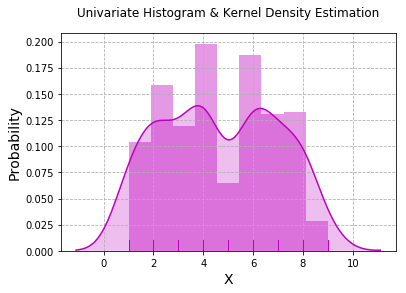

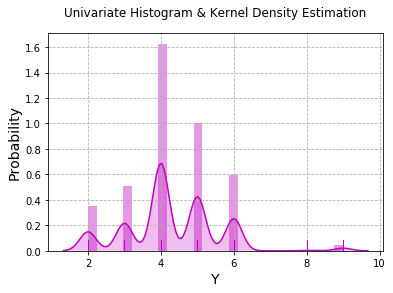

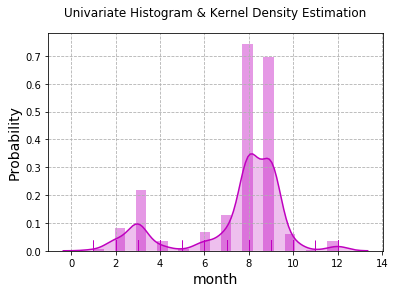

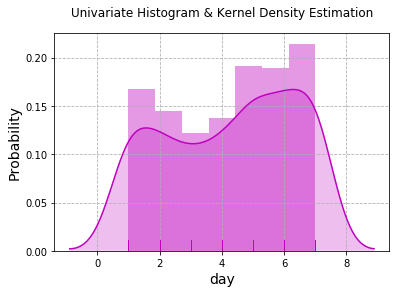

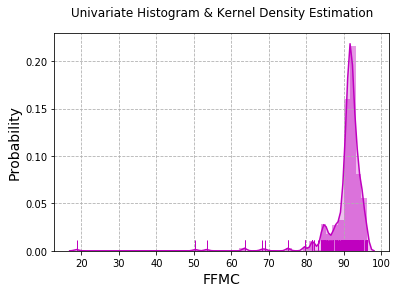

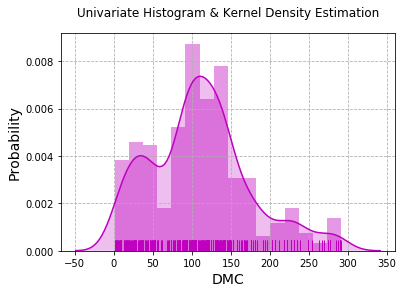

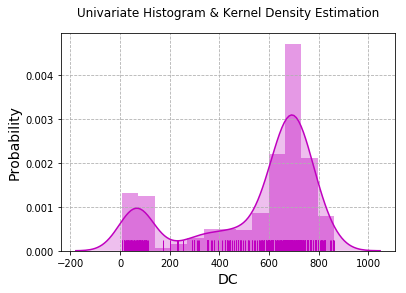

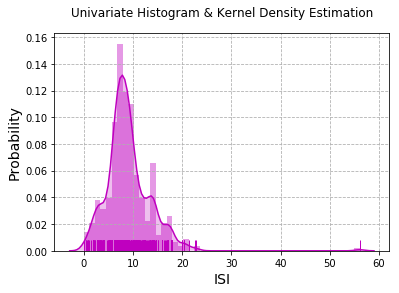

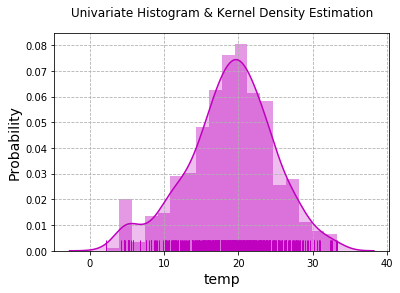

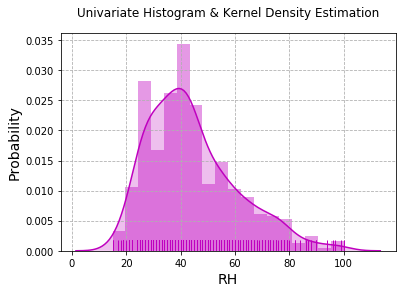

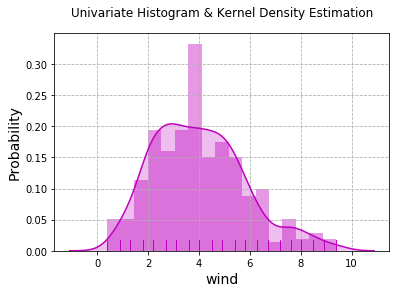

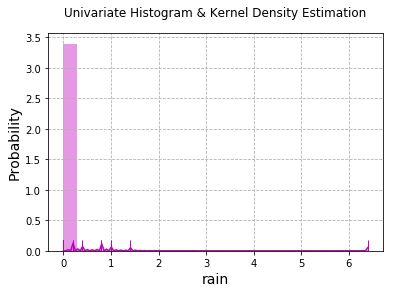

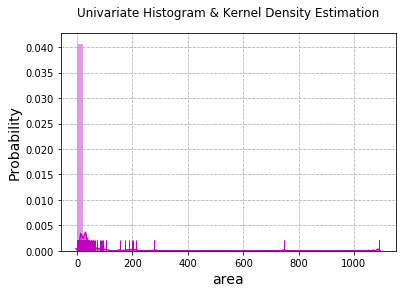

In [2]:
'''
: Function name: singleparameterdistribution
: Function works to demonstrate the distribution of all single variables in our dataset
  There are three distribution modes: 1) histograms (hist=True), color palatte:'r' 
  									  2) kernel density estimation plots(kde=True), color palatte:'g'
  									  3) combination of both(hist=True,kde=True), color palatte:'m'
: type variable: list[str]
: param variable: list containing any from ['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']
: type figNo: int
: param figNo: number of figures plot= number of variables plot
	
'''

def singleparameterdistribution(kde=True,hist=True,variable=['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area'],figNo=13):
  	assert isinstance(variable,list)
  	assert isinstance(figNo,int)
  	assert figNo==len(variable) #number of figures plot= number of variables plot
  	for i in range(figNo):
  		assert isinstance(variable[i],str)
  		assert variable[i] in ['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']# no input variable outside dataset
  		plt.figure(i)
  		if hist==True and kde==False: # Univariate Histograms
  			t='Univariate Histogram'
  			y='Frequency'
  			clr='r'
  		elif kde==True and hist==False:# Kernel Density Estimation
  			t='Kernel Density Estimation'
  			y='Probability'
  			clr='g'
  		else: # combination of two plots
  			t='Univariate Histogram & Kernel Density Estimation'
  			y='Probability'
  			clr='m'
  		plt.title(t,fontsize=12,position=(0.5,1.05))
  		plt.ylabel(y,fontsize=14)
  		plt.xlabel(variable[i],fontsize=14)
  		plt.grid(linestyle='--') # add grids
  		sns.distplot(fire[variable[i]],kde=kde,hist=hist,kde_kws={'shade':kde},color=clr,rug=True)# add shades to kde plots and rug plots to all three kinds of plots
  		plt.show()

singleparameterdistribution(kde=True,hist=True,variable=['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area'],figNo=13)

<Figure size 432x288 with 0 Axes>

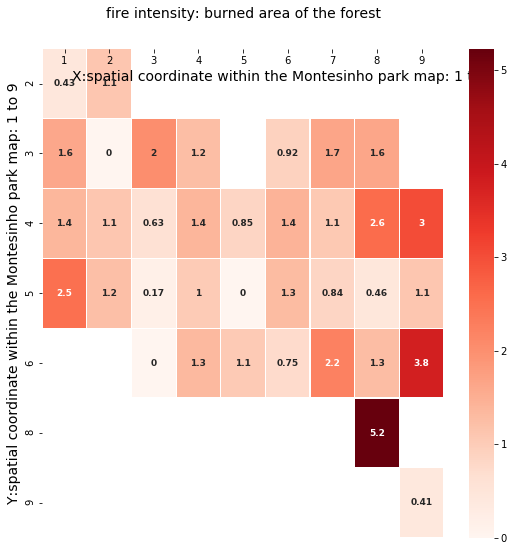

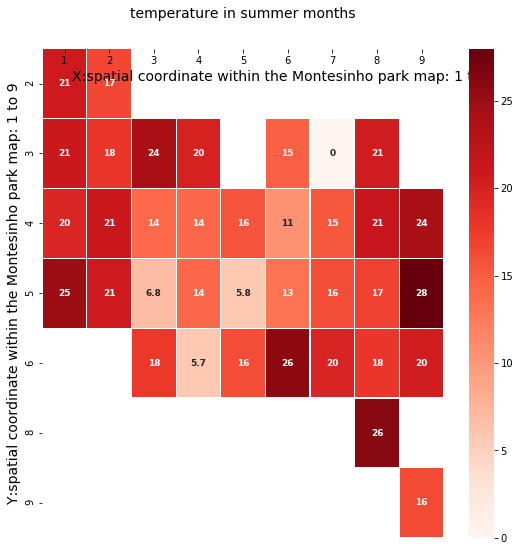

In [3]:

'''
: Function name: heatmap
: Function works to demonstrate the heatmap reagarding fire intensity or summer temperture distribution
  There are two kinds of heatmaps available: 
  		1) fire cases with spatial coordinates (coordinate=True)
  		2) summer temperatures with spatial coordinates (temperature=True)
: type figNo: int
: param figNo: number of figures plot
: type clr_background: str
: param clr_background: color palatte chosen for heatmaps, users can only set the color palattes available in Seaborn database
	
'''

def heatmap(coordinate=True,temperature=True,figNo=2,clr_background='Reds'):
	assert isinstance(figNo,int)
	assert figNo==coordinate+temperature # number of figures plots should match 
	df1=pd.DataFrame(fire,columns=['X','Y','ln(area+1)']) # set the dataframe for fire intensity 
	pt1=df1.pivot_table(index='Y', columns='X', values='ln(area+1)') #set the table and group the variables
	t1='fire intensity: burned area of the forest'

	df2=pd.DataFrame(fire,columns=['X','Y','summer_temp'])# set the dataframe for summer temperatures
	pt2=df2.pivot_table(index='Y', columns='X', values='summer_temp') #set the table and group the variables
	t2='temperature in summer months'

	for i in range(figNo): 
		if coordinate==True and temperature==False:
			pt=[pt1] # set the pivot table
			t=[t1] # set the title 
		elif temperature==True and coordinate==False:
			pt=[pt2] # set the pivot table
			t=[t2] # set the title 
		else:
			pt=[pt1,pt2] # set the pivot table
			t=[t1,t2] # set the title 
		plt.figure(i)
		f,ax=plt.subplots(figsize = (9, 9)) # set figure size
		ax.spines['bottom'].set_position(('data', 0)) # set the position for axis
		ax.spines['left'].set_position(('data', 0))
		sns.heatmap(pt[i], cmap = clr_background, linewidths = 0.1,ax = ax,annot=True, annot_kws={'size':9,'weight':'bold'})
		# pt[i]: point to the pivot tables for different kinds of heatmaps
		#annot: annotate data values in the box of heat map
		plt.xlabel('X:spatial coordinate within the Montesinho park map: 1 to 9',fontsize=14,position=(0.6,1.05))
		plt.ylabel('Y:spatial coordinate within the Montesinho park map: 1 to 9',fontsize=14)
		plt.title(t[i],fontsize=14, position=(0.5,1.05)) # t[i]: point to the titles for different kinds of heatmaps
	plt.show() 
    
heatmap(coordinate=True,temperature=True,figNo=2,clr_background='Reds')

C:\Users\meher\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


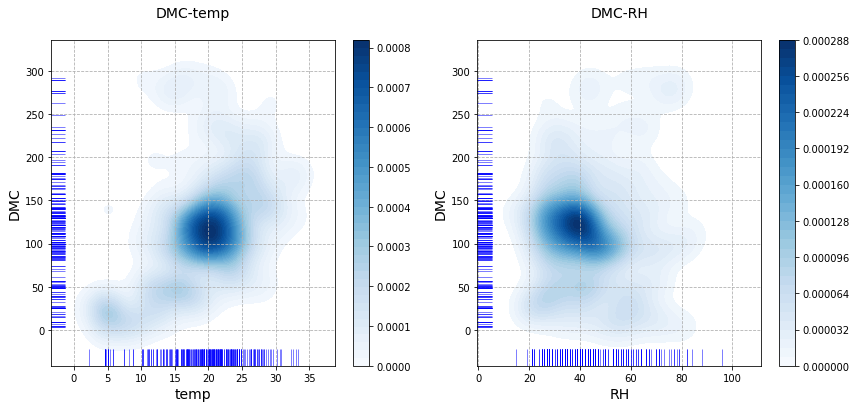

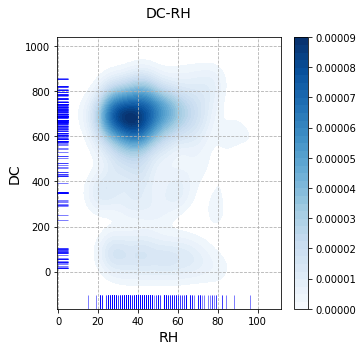

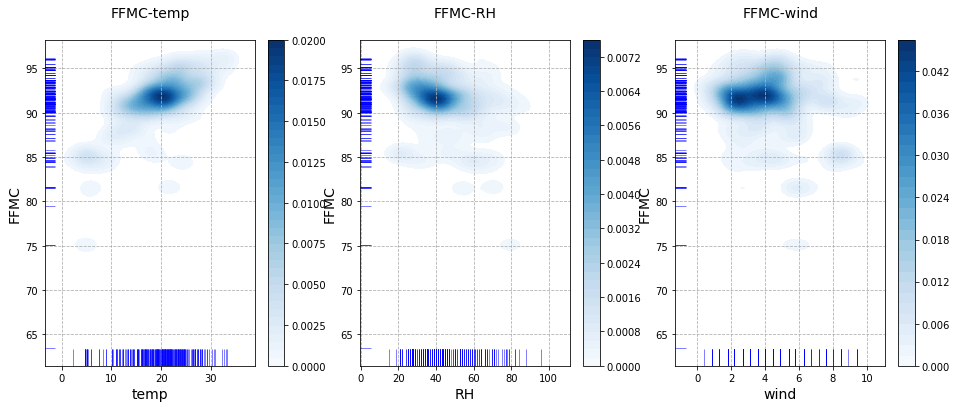

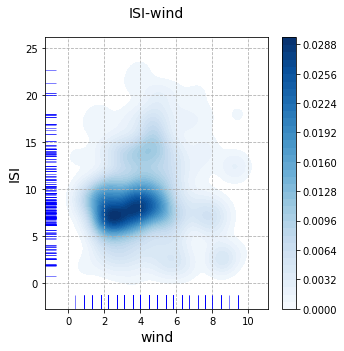

In [4]:
'''
: Function name: ModelFeature_kdeplots
: Function works to demonstrate the kdeplots reagarding fire intensity with model features against natural features
  Explanation of kde plots: 
  		1) x-axis: natural feature from ['temp','RH','wind'] P.S.: rain has been ignored since 99.6% of its data =0 which will have no density in kdeplots
  		2) y-aixs: model feature from ['DMC','DC','FFMC','ISI']
  		3) color shades: fire intensity by values of 'ln(area+1)'
  		4) color bar: demonstrating the change and scope of values from 'ln(area+1)'
  		5) rug plots at each axis: mark the values of natural feature/model feature
  		6) scatters: locate the fire cases 
: type model_nature: dict{str:list}
: param model_nature: model_nature.keys():model features
					  model_nature.values(): a list of natural features that influence the corresponding key/model feature
					  P.S.: If user relate a natural feature having no relationship with the model feature in the dict, assertion error will be thrown 
: type figNo: int
: param figNo: number of figures plot= number of model features in dict 
: type clr_background: str
: param clr_background: color palatte chosen for kdeplots, users can only set the color palattes available in Seaborn database
: type clr_rugplots: str
: param clr_rugplots: color palatte chosen for rugplots, users can only set the color available in Seaborn database
: type scatters: bool
: param scatters: whether to show scatters in kdeplots(True/False)
	
'''

def ModelFeature_kdeplots(model_nature={'DMC':['temp','RH']},figNo=2,clr_background='Blues',clr_rugplots='blue',scatters=True):
	assert isinstance(model_nature,dict)
	assert isinstance(figNo,int)
	assert figNo==len(model_nature.keys()) #number of figures plot= number of model features in dict 
	assert isinstance(clr_background,str)
	assert isinstance(clr_rugplots,str)
	
	for i in model_nature.keys():
		assert isinstance(i,str) and i in ['DMC','DC','FFMC','ISI'] #only the model feature in dataset
		assert isinstance(model_nature[i],list)
		if i == 'DMC': # the following if/else commands make sure users can only match the model feature with those natural ones having influence on it 
			for j in model_nature[i]:
				assert isinstance(j,str) and j in ['temp','RH'] # DMC can only be related to temperature and relative humidity
		elif i=='DC':
			for j in model_nature[i]:
				assert isinstance(j,str) and j in ['RH']
		elif i=='FFMC':
			for j in model_nature[i]:
				assert isinstance(j,str) and j in ['temp','RH','wind']
		elif i=='ISI':
			for j in model_nature[i]:
				assert isinstance(j,str) and j in ['wind']
	
	for i in range(figNo):
		x=[i for i in model_nature.keys()]# a lits of all model features entered
		m=len(model_nature[x[i]]) # the number of natural features for one model feature 
		n=100+10*m+1 # the index of subplot
		if m==1: figsize=(5,5)
		elif m==2: figsize=(14,6)
		else: figsize=(16,6) # set the figsize 
		plt.figure(i,figsize)
		for j in range(m):               
			plt.subplot(n)
			plt.title(x[i]+'-'+model_nature[x[i]][j], fontsize=14, position=(0.5,1.05))
			plt.xlabel(model_nature[x[i]][j],fontsize=14)
			plt.ylabel(x[i],fontsize=14)
			sns.kdeplot(c[model_nature[x[i]][j]],c[x[i]], # !! c is the new dataframe for data in firecases 
			           cbar = True,    # display color bar
			           shade = True,   # display shades
			           cmap = clr_background,  # set the color palatte
			           shade_lowest=False,  # not display periphery color/shade
			           n_levels = 40   # number of curves, the higher, the smoother
			           )# the color change indicates the change of density
			plt.grid(linestyle = '--')# show grids
			if scatters==True: #set scatters with their sizes, colors and shapes 
				plt.scatter(c[model_nature[x[i]][j]],c[x[i]], s=5, alpha = 0.5, color = 'r', marker='*') 
			sns.rugplot(c[model_nature[x[i]][j]], color=clr_rugplots, axis='x',alpha = 0.5) #set the rugplots 
			sns.rugplot(c[x[i]], color=clr_rugplots, axis='y',alpha = 0.5)
			n+=1
	plt.show()

ModelFeature_kdeplots(model_nature={'DMC':['temp','RH'],'DC':['RH'],'FFMC':['temp','RH','wind'],'ISI':['wind']},figNo=4,clr_background='Blues',clr_rugplots='blue',scatters=False)

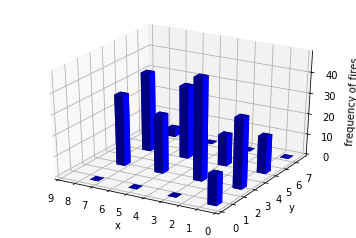

In [5]:
import pandas as pd
fire=pd.read_csv('forestfires.csv')
intensity=fire.area
X=fire.X
Y=fire.Y
def frequency_of_fires(intensity,X,Y):
    """
    For plotting the the frequency of fires in different grids of the park
    The areas with fire are filtered first and their frequency of recording a fire is plotted as a 3D plot. 
    Outliers are not included by default as only data with fires is considered.
    area column indicates the spread of the fire. Considered as intensity for all purposes.
    """
    from mpl_toolkits.mplot3d import Axes3D 
    import matplotlib.pyplot as plt
    import numpy as np
    assert isinstance(intensity, pd.core.series.Series)
    assert isinstance(X, pd.core.series.Series)
    assert isinstance(Y, pd.core.series.Series)
    assert intensity.all()>=0
    assert 0<X.all()<10
    assert 0<Y.all()<10
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x=X.iloc[intensity.nonzero()[0]]
    y=Y.iloc[intensity.nonzero()[0]]
    #chose fewer bins to make it look less crowded.
    hist, xedges, yedges = np.histogram2d(x,y,bins=4,range=[[0, 9], [0,9]])
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()
    #plt.ylim(9,0)
    plt.xlim(9,0)
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("frequency of fires")
    plt.show()
    
frequency_of_fires(intensity,X,Y)

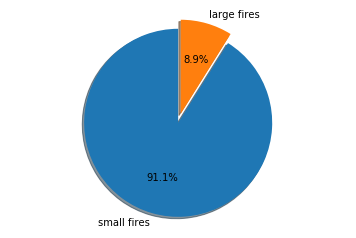

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
fire=pd.read_csv('forestfires.csv')
intensity=fire.area

def plot_areas_with_fires(intensity):
    '''
    Plots the large and small fires as a pie chart showing the 
    probability of occurrence of each
    '''
    import pandas as pd
    import matplotlib.pyplot as plt
    assert isinstance(intensity, pd.core.series.Series)
    assert intensity.all()>=0
    inten=intensity.iloc[intensity.nonzero()[0]]
    total=inten.count()
    small=inten[inten < 50 ].count() 
    large=inten[inten > 50 ].count() 
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'small fires','large fires'
    sizes = [small, large]
    explode = (0, 0.1)  # only "explode" the 2nd slice 

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  
    plt.show()
    
plot_areas_with_fires(intensity)

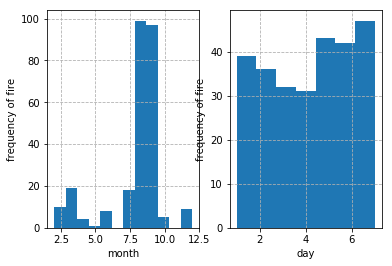

In [7]:
import pandas as pd
fire=pd.read_csv('forestfires.csv')
month=fire.month.map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
intensity=fire.area
day=fire.day.map({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 'sat':6, 'sun':7})

def fires_and_month_day(intensity, month, day):
    '''
    Plots the frequency of observing fires in respective months and days
    '''
    import matplotlib.pyplot as plt
    assert isinstance(intensity, pd.core.series.Series)
    assert isinstance(month, pd.core.series.Series)
    assert isinstance(day, pd.core.series.Series)
    assert intensity.all()>=0
    assert 0<month.all()<13
    assert 0<day.all()<8
    month_num=month.iloc[intensity.nonzero()[0]]
    day_num=day.iloc[intensity.nonzero()[0]]
    fig, axs = plt.subplots(1, 2)
    axs[0].grid(linestyle = '--')
    axs[1].grid(linestyle = '--')
    axs[0].hist(month_num, bins=12)
    axs[1].hist(day_num.dropna(), bins=7)
    axs[0].set_xlabel('month')
    axs[0].set_ylabel('frequency of fire')
    axs[1].set_xlabel('day')
    axs[1].set_ylabel('frequency of fire')
    plt.show()

    
fires_and_month_day(intensity,month,day)

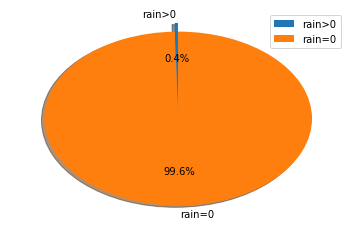

In [8]:
import pandas as pd
fire=pd.read_csv('forestfires.csv')
intensity=fire.area
rain=fire.rain

def rain_plot(rain):
    '''
    Plots chart showing the variance of the feature-rain in the data
    '''
    import matplotlib.pyplot as plt
    assert isinstance(rain, pd.core.series.Series)
    assert rain.all()>=0
    r_1=rain[rain.le(1)].count() 
    r_2=rain[rain.le(4)].count()
    r_3=rain[rain.ge(4)].count()
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels ='rain>0','rain=0'
    sizes = [r_2+r_3-r_1,r_1]
    explode = (0.1,0)
    fig1, ax1 = plt.subplots(1)
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    plt.legend(labels, loc="best")
    plt.show()
    
rain_plot(rain)

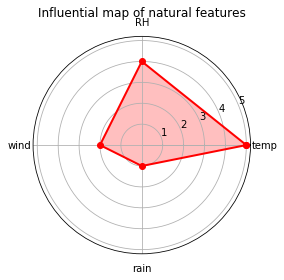

In [9]:
import numpy as np
import matplotlib.pyplot as plt

labels = np.array(['temp','RH','wind','rain'])

dataLenth = 4

data = np.array([5,4,2,1])

angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
data = np.concatenate((data, [data[0]])) 
angles = np.concatenate((angles, [angles[0]])) 
 
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, data, 'ro-', linewidth=2)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title('Influential map of natural features', va='bottom')
ax.fill(angles, data, facecolor='r', alpha=0.25)
ax.grid(True)
plt.show()

After training, use the rest as test data
This SVM applied natural features: temp, RH, wind and rain


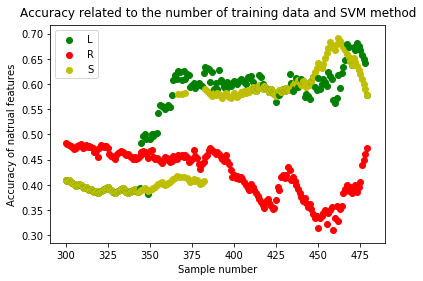

Forest fire alarm!


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.preprocessing import StandardScaler

from sklearn import svm

fire=np.genfromtxt('http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv', delimiter=',', skip_header=True)

data = fire.tolist()
    
def cal_accuracy(predict, y_test):
    '''
    Calculate the accuracy of prediction with test data
    predict: result of prediction
    '''
    count=0
    pool=len(predict)
    for i in range(pool):
        if predict[i]==y_test[i]:
            count=count+1
    accuracy=count/pool
    return accuracy

def Do_SVM(split, SVM_C, train, test_sample):
   '''
   Use SVC to classify
   split: the number of training data, the number of test data will be 517-split
   SVM: C value for SVM
   train: the type of data for training: natural-1 or model-0
   '''
   X_train=[]
   y_train=[]
   X_test=[]
   y_test=[]

   for i in range(1, split):
      if train==0:
          X_train.append(data[i][4:8])
      if train==1:
          X_train.append(data[i][8:12])
      y_train.append(data[i][12])

   for i in range(split-1):
      y_train[i]=float(y_train[i])
      if y_train[i]>0:
          y_train[i]=1
      else:
          y_train[i]=0

   if test_sample > 0:
       for i in range(test_sample, 517):#split
            if train==0:
                X_test.append(data[i][4:8])
            if train==1:
                X_test.append(data[i][8:12])
            y_test.append(data[i][12])
    
       for i in range(517-test_sample):#split
            y_test[i]=float(y_test[i])
            if y_test[i]>0:
                y_test[i]=1
            else:
                y_test[i]=0
   else:
       for i in range(split, 517):#split
            if train==0:
                X_test.append(data[i][4:8])
            if train==1:
                X_test.append(data[i][8:12])
            y_test.append(data[i][12])
    
       for i in range(517-split):#split
            y_test[i]=float(y_test[i])
            if y_test[i]>0:
                y_test[i]=1
            else:
                y_test[i]=0
        
   '''
   Three kinds of SVM methods
   '''    
   clf_linear=svm.SVC(SVM_C,kernel='linear').fit(X_train,y_train)
   clf_rbf=svm.SVC(SVM_C, kernel='rbf').fit(X_train,y_train)
   clf_sigmoid=svm.SVC(SVM_C, kernel='sigmoid').fit(X_train,y_train)

   predict_linear = clf_linear.predict(X_test)
   predict_rbf = clf_rbf.predict(X_test)
   predict_sigmoid= clf_sigmoid.predict(X_test)

   a = cal_accuracy(predict_linear, y_test)
   b = cal_accuracy(predict_rbf, y_test)
   c = cal_accuracy(predict_sigmoid, y_test)
   return a, b, c

def draw_SVM_trend(a,b,SVM_C,Type,test_sample):
    '''
    a is the lower bounder of training samples
    a: int; 0=<a<b
    b is the upper bounder of training samples
    b: int; a<b<517
    SVM_C is the C value for SVM
    SVM_C: int
    Type is for applying natural features-1 or model features-0 
    Type: int; C=0 or 1
    test_sample is to control the number of test samples to be the same
    test_sample: int; test_sample >=0
    '''
    assert isinstance(a, int)
    assert a>=0
    assert isinstance(b, int)
    assert b>=a
    assert b<517
    assert isinstance(SVM_C, int)
    assert isinstance(Type, int)
    assert Type==0 or Type==1
    assert isinstance(test_sample, int)
    assert test_sample>=0
    
    if test_sample==0:
        print('After training, use the rest as test data')
    else:
        print('test samples are from %d to 517'%(test_sample))
    for i in range(a,b):
        a, b, c= Do_SVM(i, SVM_C, Type, test_sample)
        plt.scatter(i, a, c='g')
        plt.scatter(i, b, c='r') 
        plt.scatter(i, c, c='y')
        plt.legend('LRS') 

    plt.xlabel('Sample number')
    if Type==0:
        print('This SVM applied features in the model: FFMC, DMC, DC and ISI')
        plt.ylabel('Accuracy of model features')
    else:
        print('This SVM applied natural features: temp, RH, wind and rain')
        plt.ylabel('Accuracy of natrual features')
    plt.title('Accuracy related to the number of training data and SVM method', va='bottom')
    plt.show()

def Give_prediction(temp_value, RH_value):
    '''
    The most suitable SVM method sigmoid kernel is used
    All the data is used as training data
    From our test, C value for SVM training is selected to be 1
    Use only two dominant natural features, temp and RH to make prediction
    The temp is between 0 and 35
    The RH is between 0 and 100 
    '''
    assert isinstance(temp_value, int)
    assert temp_value<35 and temp_value>0
    assert isinstance(RH_value, int)
    assert RH_value<100 and RH_value>0
    
    X_train=[]
    y_train=[]
    for i in range(517):
        X_train.append(data[i][8:10])
        y_train.append(data[i][12])
    
    for i in range(517):
      y_train[i]=float(y_train[i])
      if y_train[i]>0:
          y_train[i]=1
      else:
          y_train[i]=0
          
    clf_sigmoid=svm.SVC(1, kernel='sigmoid').fit(X_train,y_train)
    predict_rbf = clf_sigmoid.predict([[temp_value, RH_value]])
    if predict_rbf == 1:
        print('Forest fire alarm!')
    if predict_rbf == 0:
        print('Low probability of forest fire.')
    
'''
Example function: 
This function will draw the trend of accuracy
The number of training data from 300 to 480
The C value for SVM is selected to be 1
Natural features will be used
After training, the rest of data will be used as test data
'''
draw_SVM_trend(300,480,1,1,0)

'''
Example function:
This function will show the prediction when temp=25
and RH=20
'''
Give_prediction(25, 20)

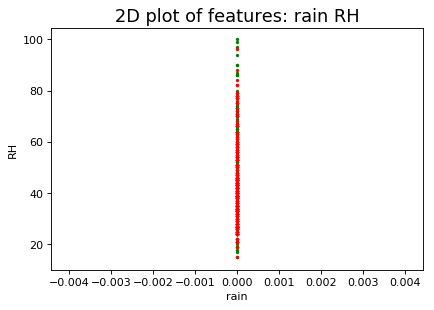

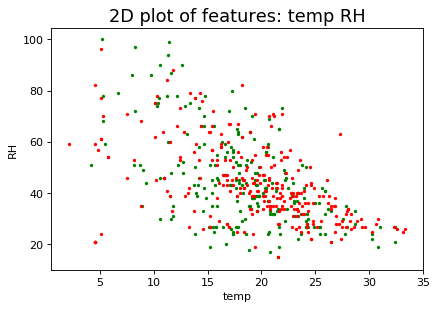

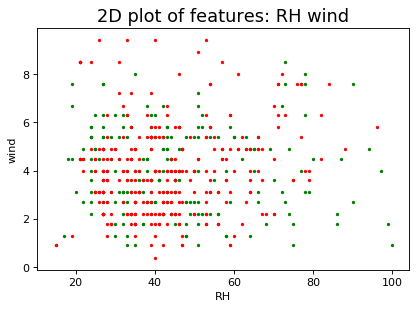

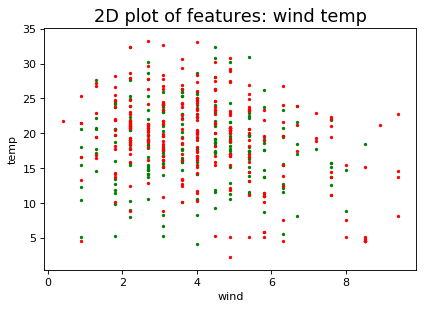

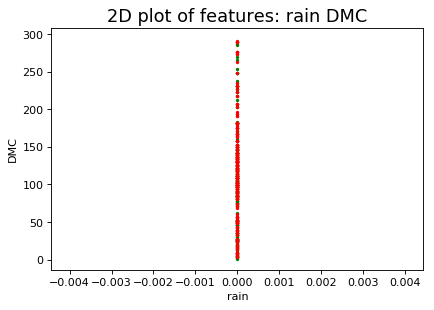

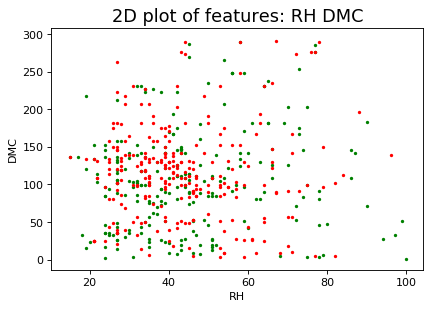

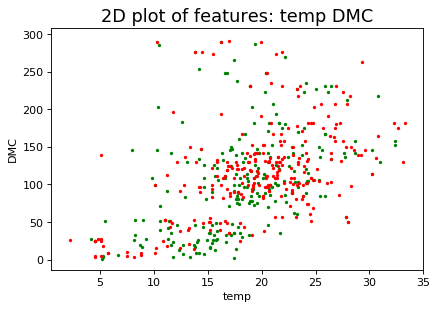

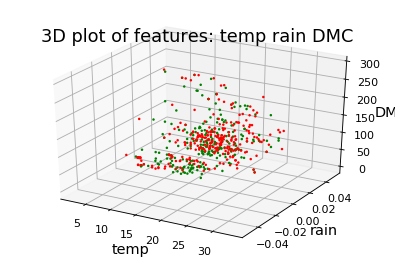

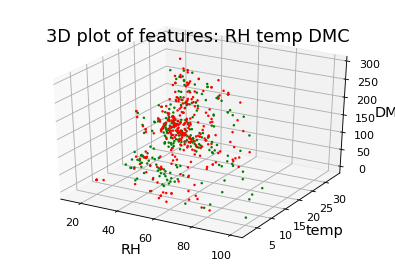

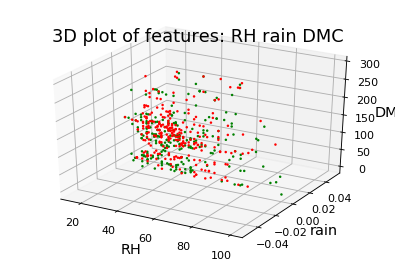

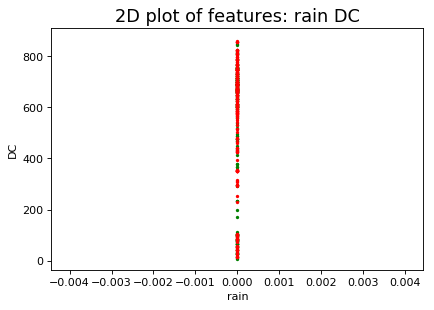

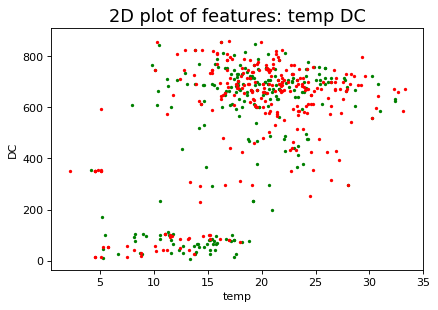

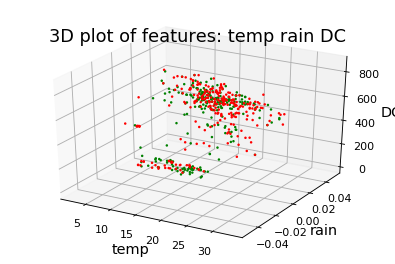

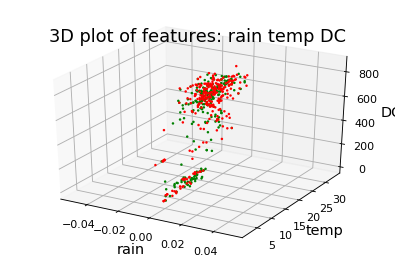

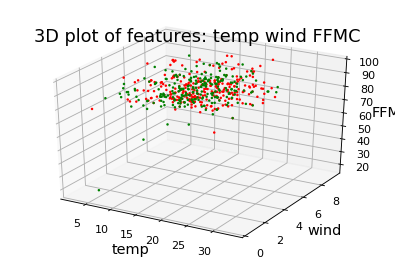

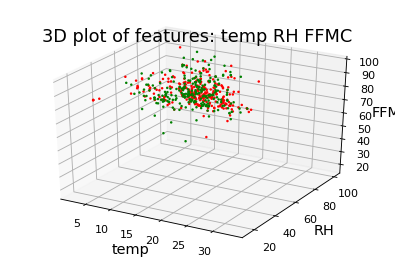

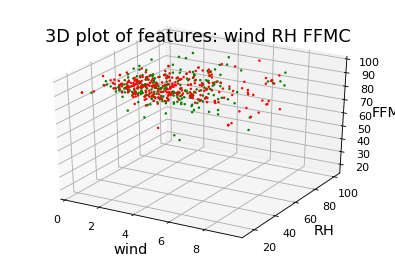

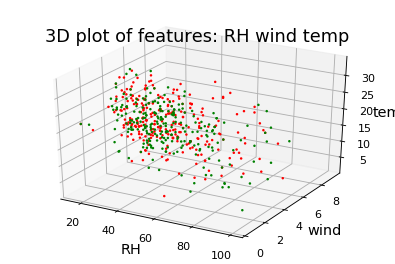

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import csv
from sklearn.preprocessing import StandardScaler
from itertools import combinations
from IPython.core.pylabtools import figsize

fire = pd.read_csv('forestfires.csv')

for i in range(517):
    '''
    Initalize the value of area: when area is larger the zero, set it to one;
    '''
    if fire.loc[i, 'rain']>0.15:
        fire.loc[i, 'rain']=0
    if fire.loc[i, 'area']>0:
        fire.loc[i, 'area']=1
    else:
        fire.loc[i, 'area']=0

plt.rcParams['figure.dpi'] = 80

def doplot(x,y):
    '''
    This function is for 2D scatter ploting
    Its two inputs should be strings of the column names of the dataset
    '''
    ax = plt.subplot(111)
    colors = ['g', 'r']
    Label_Com = ['No fire','Fire']
    for index in range(2):
        x_axis = fire.loc[fire['area'] == index][x]
        y_axis = fire.loc[fire['area'] == index][y]
        plt.scatter(x_axis, y_axis, c=colors[index], cmap='brg', alpha=1, marker='.', linewidth=0)
        ax.set_title('2D plot of features: %s' %(x+' ' +y), fontsize=16)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.show()

def triplot(x,y,z):
    '''
    This function is for 3D scatter ploting
    Its three inputs should be strings of the column names of the dataset
    '''
    ax = plt.subplot(111, projection='3d')
    colors = ['g', 'r']
    Label_Com = ['No fire','Fire']
    for index in range(2):
        x_axis = fire.loc[fire['area'] == index][x]
        y_axis = fire.loc[fire['area'] == index][y]
        z_axis = fire.loc[fire['area'] == index][z]
        ax.set_xlabel(x, fontsize=13)
        ax.set_ylabel(y, fontsize=13)
        ax.set_zlabel(z, fontsize=13)
        ax.scatter(x_axis, y_axis, z_axis, c=colors[index], cmap='brg', alpha=1, marker='.', linewidth=0)
        ax.set_title('3D plot of features: %s' %(x+' ' +y+' ' +z), fontsize=16)
    plt.show()


doplot('rain','RH')
doplot('temp','RH')
doplot('RH','wind')
doplot('wind','temp')

doplot('rain','DMC')
doplot('RH','DMC')
doplot('temp','DMC')

triplot('temp','rain','DMC')
triplot('RH','temp','DMC')
triplot('RH','rain','DMC')

doplot('rain','DC')
doplot('temp','DC')

triplot('temp','rain','DC')
triplot('rain','temp','DC')

triplot('temp','wind','FFMC')
triplot('temp','RH','FFMC')
triplot('wind','RH','FFMC')

triplot('RH','wind','temp')
